In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [2]:
np.random.seed(42)
print("=== LINEAR REGRESSION WITH GRADIENT DESCENT - COMPLETE VISUALIZATION ===\n")
print("STEP 1: Generating synthetic dataset...")
true_slope = 2.5
true_intercept = 1.8

=== LINEAR REGRESSION WITH GRADIENT DESCENT - COMPLETE VISUALIZATION ===

STEP 1: Generating synthetic dataset...


In [3]:
x = np.linspace(0, 10, 50)
noise = np.random.normal(0, 1.5, len(x))
y = true_slope * x + true_intercept + noise
print(f"True relationship: y = {true_slope:.1f}*x + {true_intercept:.1f}")
print(f"Dataset shape: X={x.shape}, y={y.shape}")
print(f"First 5 X values: {x[:5]}")
print(f"First 5 y values: {y[:5]}\n")

True relationship: y = 2.5*x + 1.8
Dataset shape: X=(50,), y=(50,)
First 5 X values: [0.         0.20408163 0.40816327 0.6122449  0.81632653]
First 5 y values: [2.54507123 2.10280763 3.79194097 5.61515703 3.48958626]



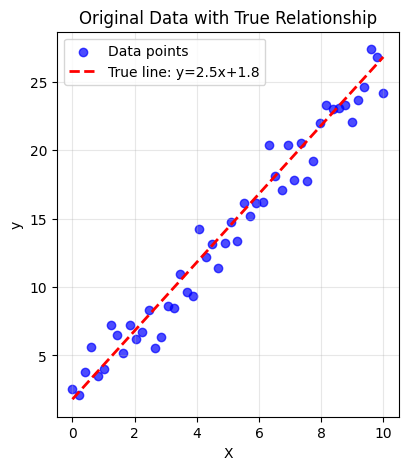

In [4]:
# =============================================================================
# STEP 2: PLOT ORIGINAL DATA
# =============================================================================
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.7, color='blue', label='Data points')
plt.plot(x, true_slope*x + true_intercept, 'r--', linewidth=2,
         label=f'True line: y={true_slope:.1f}x+{true_intercept:.1f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Data with True Relationship')
plt.legend()
plt.grid(True, alpha=0.3)

In [ ]:
# =============================================================================
# STEP 3: GRADIENT DESCENT IMPLEMENTATION
# =============================================================================


In [5]:
def compute_loss(x, y, w, b):
  m = len(x)
  pred = w*x + b
  loss = (1/(2*m)) * np.sum((pred - y)**2)
  return loss

In [6]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    m = len(x)
    w = w_init
    b = b_init

    # Store history for visualization
    w_history = []
    b_history = []
    loss_history = []
    print(f"\nStarting Gradient Descent:")
    print(f"Initial parameters: w = {w:.4f}, b = {b:.4f}")
    print(f"Learning rate: {learning_rate}, Iterations: {iterations}")
    print("-" * 60)

    for i in range(num_iters):
        # Compute predictions and loss
        y_pred = w * x + b
        dw = (1/m) * np.sum((y_pred - y) * x)
        db = (1/m) * np.sum(y_pred - y)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        loss = compute_loss(x, y, w, b)

        w_history.append(w)
        b_history.append(b)
        loss_history.append(loss)

         # Print progress every 50 iterations
        if i % 50 == 0 or i == iterations - 1:
            print(f"Iteration {i:4d}: w = {w:.4f}, b = {b:.4f}, Cost = {loss:.4f}")

    print("-" * 60)
    print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")
    print(f"True parameters:  w = {true_slope:.4f}, b = {true_intercept:.4f}")

    return np.array(w_history), np.array(b_history), np.array(loss_history)



In [7]:
# Initialize parameters
w_initial = 0.0
b_initial = 0.0
learning_rate = 0.01
iterations = 200

In [8]:
# Run gradient descent
w_history, b_history, loss_history = gradient_descent(x, y, w_initial, b_initial,
                                                     learning_rate, iterations)


Starting Gradient Descent:
Initial parameters: w = 0.0000, b = 0.0000
Learning rate: 0.01, Iterations: 200
------------------------------------------------------------
Iteration    0: w = 0.9074, b = 0.1396, Cost = 53.8675
Iteration   50: w = 2.6106, b = 0.5760, Cost = 1.1530
Iteration  100: w = 2.5872, b = 0.7325, Cost = 1.1029
Iteration  150: w = 2.5665, b = 0.8705, Cost = 1.0639
Iteration  199: w = 2.5487, b = 0.9898, Cost = 1.0342
------------------------------------------------------------
Final parameters: w = 2.5487, b = 0.9898
True parameters:  w = 2.5000, b = 1.8000



STEP 3: Creating Error Surface Visualization...


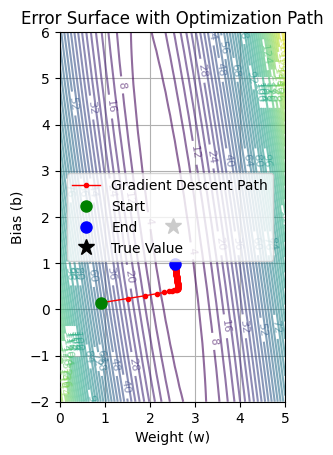

In [9]:
# =============================================================================
# STEP 4: ERROR SURFACE PLOT
# =============================================================================
print("\nSTEP 3: Creating Error Surface Visualization...")

# Create meshgrid for error surface
w_range = np.linspace(0, 5, 50)
b_range = np.linspace(-2, 6, 50)
W, B = np.meshgrid(w_range, b_range)

# Compute cost for each combination
Z = np.zeros_like(W)
for i in range(len(w_range)):
    for j in range(len(b_range)):
        Z[j, i] = compute_loss(x, y, W[j, i], B[j, i])

# Plot error surface
plt.subplot(1, 2, 1)
contour = plt.contour(W, B, Z, levels=50, alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)
plt.plot(w_history, b_history, 'ro-', markersize=3, linewidth=1,
         label='Gradient Descent Path')
plt.plot(w_history[0], b_history[0], 'go', markersize=8, label='Start')
plt.plot(w_history[-1], b_history[-1], 'bo', markersize=8, label='End')
plt.plot(true_slope, true_intercept, 'k*', markersize=12, label='True Value')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Error Surface with Optimization Path')
plt.legend()
plt.grid()

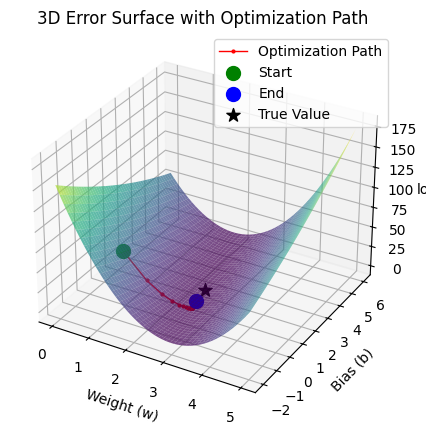

In [10]:
# =============================================================================
# STEP 5: 3D ERROR SURFACE PLOT
# =============================================================================
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W, B, Z, cmap=cm.viridis, alpha=0.7)
ax1.plot(w_history, b_history, loss_history, 'r.-', markersize=4, linewidth=1,
         label='Optimization Path')
ax1.scatter([w_history[0]], [b_history[0]], [loss_history[0]],
           color='green', s=100, label='Start')
ax1.scatter([w_history[-1]], [b_history[-1]], [loss_history[-1]],
           color='blue', s=100, label='End')
ax1.scatter([true_slope], [true_intercept],
           [compute_loss(x, y, true_slope, true_intercept)],
           color='black', s=100, marker='*', label='True Value')
ax1.set_xlabel('Weight (w)')
ax1.set_ylabel('Bias (b)')
ax1.set_zlabel('loss')
ax1.set_title('3D Error Surface with Optimization Path')
ax1.legend()


STEP 4: Creating Regression Line Evolution...


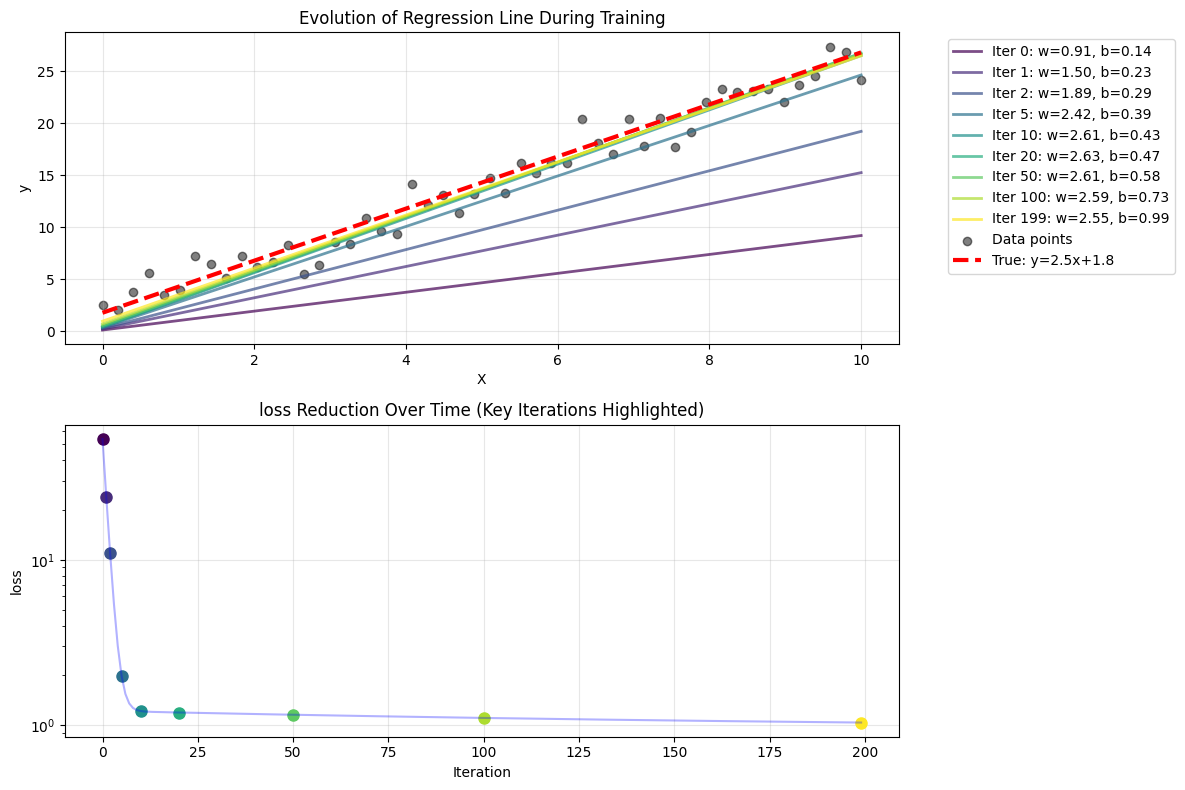

In [11]:
print("\nSTEP 4: Creating Regression Line Evolution...")

# Select key iterations to show
key_iterations = [0, 1, 2, 5, 10, 20, 50, 100, 199]


plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(key_iterations)))

for i, idx in enumerate(key_iterations):
    if idx < len(w_history):
        w_current = w_history[idx]
        b_current = b_history[idx]
        cost_current = loss_history[idx]

        y_pred_current = w_current * x + b_current
        plt.subplot(2, 1, 1)
        plt.plot(x, y_pred_current, color=colors[i], alpha=0.7, linewidth=2,
                label=f'Iter {idx}: w={w_current:.2f}, b={b_current:.2f}')

        plt.subplot(2, 1, 2)
        plt.plot(idx, cost_current, 'o', color=colors[i], markersize=8)
# Finalize plots
plt.subplot(2, 1, 1)
plt.scatter(x, y, alpha=0.5, color='black', label='Data points')
plt.plot(x, true_slope*x + true_intercept, 'r--', linewidth=3,
         label=f'True: y={true_slope:.1f}x+{true_intercept:.1f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Evolution of Regression Line During Training')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(range(iterations), loss_history, 'b-', alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title('loss Reduction Over Time (Key Iterations Highlighted)')
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

=== 3D GRADIENT DESCENT ANIMATION GENERATOR ===
Running example gradient descent...
Creating 3D Animation...
Generating 100 animation frames...
Saving animation as MP4 video...
Saving frame 100/100
Animation saved as 'gradient_descent_3d_animation.mp4'

Animation completed! Check the generated video file.


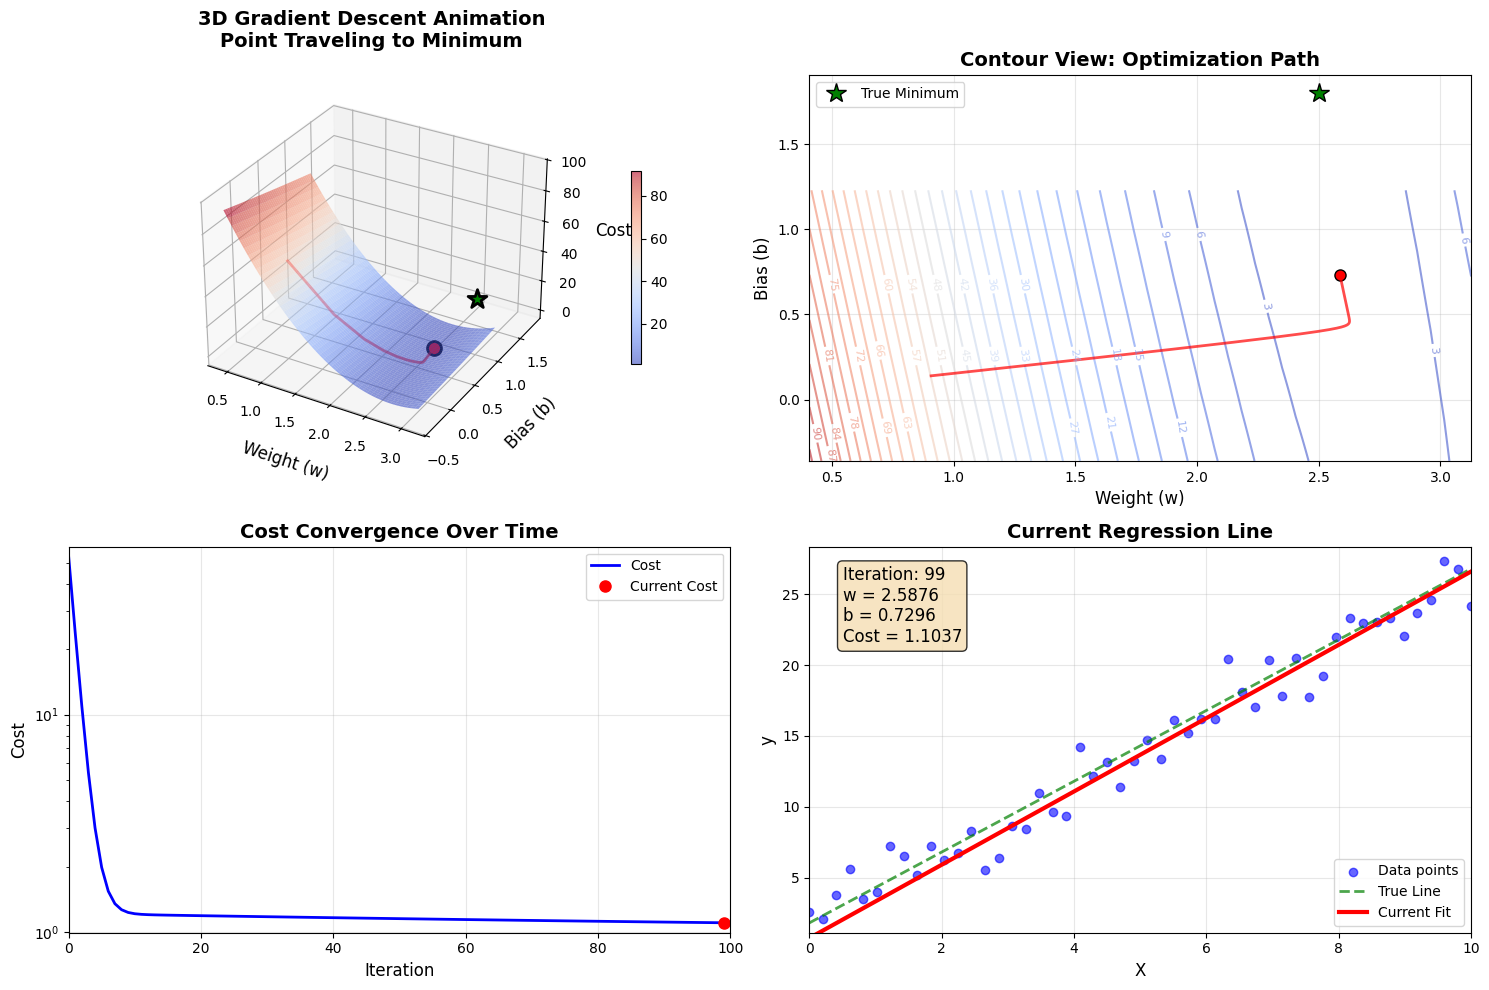

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

def create_3d_animation(x, y, w_history, b_history, cost_history, true_slope, true_intercept):
    """
    Create a 3D animation of gradient descent optimization
    """
    print("Creating 3D Animation...")

    # Create figure
    fig = plt.figure(figsize=(15, 10))

    # =========================================================================
    # SUBPLOT 1: 3D ANIMATION
    # =========================================================================
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')

    # Create meshgrid for error surface
    w_range = np.linspace(min(w_history) - 0.5, max(w_history) + 0.5, 50)
    b_range = np.linspace(min(b_history) - 0.5, max(b_history) + 0.5, 50)
    W, B = np.meshgrid(w_range, b_range)

    # Compute cost surface
    Z = np.zeros_like(W)
    for i in range(len(w_range)):
        for j in range(len(b_range)):
            Z[j, i] = compute_cost(x, y, W[j, i], B[j, i])

    # Plot the surface
    surf = ax1.plot_surface(W, B, Z, cmap=cm.coolwarm, alpha=0.6,
                           linewidth=0, antialiased=True)

    # Plot the true minimum
    true_cost = compute_cost(x, y, true_slope, true_intercept)
    ax1.scatter([true_slope], [true_intercept], [true_cost],
               color='green', s=200, marker='*', label='True Minimum',
               edgecolors='black', linewidth=2)

    # Set labels and title
    ax1.set_xlabel('Weight (w)', fontsize=12, labelpad=10)
    ax1.set_ylabel('Bias (b)', fontsize=12, labelpad=10)
    ax1.set_zlabel('Cost', fontsize=12, labelpad=10)
    ax1.set_title('3D Gradient Descent Animation\nPoint Traveling to Minimum',
                  fontsize=14, fontweight='bold', pad=20)

    # Add colorbar
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=20, pad=0.1)

    # =========================================================================
    # SUBPLOT 2: CONTOUR PLOT WITH PATH
    # =========================================================================
    ax2 = fig.add_subplot(2, 2, 2)

    # Create contour plot
    contour_levels = 30
    contour = ax2.contour(W, B, Z, levels=contour_levels, cmap='coolwarm', alpha=0.6)
    ax2.clabel(contour, inline=True, fontsize=8)

    # Plot true minimum
    ax2.plot(true_slope, true_intercept, 'g*', markersize=15,
            label='True Minimum', markeredgecolor='black', markeredgewidth=1)

    ax2.set_xlabel('Weight (w)', fontsize=12)
    ax2.set_ylabel('Bias (b)', fontsize=12)
    ax2.set_title('Contour View: Optimization Path', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    # =========================================================================
    # SUBPLOT 3: COST CONVERGENCE
    # =========================================================================
    ax3 = fig.add_subplot(2, 2, 3)
    cost_line, = ax3.plot([], [], 'b-', linewidth=2, label='Cost')
    current_cost_point, = ax3.plot([], [], 'ro', markersize=8, label='Current Cost')

    ax3.set_xlim(0, len(cost_history))
    ax3.set_ylim(min(cost_history) * 0.9, max(cost_history) * 1.1)
    ax3.set_xlabel('Iteration', fontsize=12)
    ax3.set_ylabel('Cost', fontsize=12)
    ax3.set_title('Cost Convergence Over Time', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    ax3.set_yscale('log')

    # =========================================================================
    # SUBPLOT 4: CURRENT REGRESSION LINE
    # =========================================================================
    ax4 = fig.add_subplot(2, 2, 4)
    data_scatter = ax4.scatter(x, y, alpha=0.6, color='blue', label='Data points')
    true_line, = ax4.plot(x, true_slope*x + true_intercept, 'g--', linewidth=2,
                         label='True Line', alpha=0.7)
    current_line, = ax4.plot([], [], 'r-', linewidth=3, label='Current Fit')
    current_params_text = ax4.text(0.05, 0.95, '', transform=ax4.transAxes,
                                  fontsize=12, verticalalignment='top',
                                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    ax4.set_xlim(min(x), max(x))
    ax4.set_ylim(min(y) - 1, max(y) + 1)
    ax4.set_xlabel('X', fontsize=12)
    ax4.set_ylabel('y', fontsize=12)
    ax4.set_title('Current Regression Line', fontsize=14, fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # Adjust layout
    plt.tight_layout()

    # =========================================================================
    # ANIMATION FUNCTIONS
    # =========================================================================

    # Initialize animation elements
    point_3d, = ax1.plot([], [], [], 'ro', markersize=10, markeredgecolor='black',
                         markeredgewidth=2, label='Current Point')
    path_3d, = ax1.plot([], [], [], 'r-', linewidth=2, alpha=0.6, label='Path')

    point_2d, = ax2.plot([], [], 'ro', markersize=8, markeredgecolor='black',
                        markeredgewidth=1, label='Current Point')
    path_2d, = ax2.plot([], [], 'r-', linewidth=2, alpha=0.7, label='Path')

    # Store animation data
    animation_data = {
        'w_history': w_history,
        'b_history': b_history,
        'cost_history': cost_history,
        'x': x,
        'y': y,
        'current_iter': 0
    }

    def init():
        """Initialize the animation"""
        point_3d.set_data([], [])
        point_3d.set_3d_properties([])
        path_3d.set_data([], [])
        path_3d.set_3d_properties([])

        point_2d.set_data([], [])
        path_2d.set_data([], [])

        cost_line.set_data([], [])
        current_cost_point.set_data([], [])

        current_line.set_data([], [])
        current_params_text.set_text('')

        return point_3d, path_3d, point_2d, path_2d, cost_line, current_cost_point, current_line, current_params_text

    def animate(frame):
        """Update animation for each frame"""
        # Use every 2nd point for smoother animation (adjust as needed)
        n_points = len(w_history)
        if n_points > 100:
            step = max(1, n_points // 100)
            current_idx = min(frame * step, n_points - 1)
        else:
            current_idx = frame

        if current_idx >= n_points:
            current_idx = n_points - 1

        # Current parameters
        w_curr = w_history[current_idx]
        b_curr = b_history[current_idx]
        cost_curr = cost_history[current_idx]

        # Update 3D plot
        point_3d.set_data([w_curr], [b_curr])
        point_3d.set_3d_properties([cost_curr])

        # Update 3D path (show path up to current point)
        path_3d.set_data(w_history[:current_idx+1], b_history[:current_idx+1])
        path_3d.set_3d_properties(cost_history[:current_idx+1])

        # Update 2D contour plot
        point_2d.set_data([w_curr], [b_curr])
        path_2d.set_data(w_history[:current_idx+1], b_history[:current_idx+1])

        # Update cost convergence plot
        iterations = list(range(current_idx + 1))
        costs = cost_history[:current_idx + 1]
        cost_line.set_data(iterations, costs)
        current_cost_point.set_data([current_idx], [cost_curr])

        # Update regression line
        y_current = w_curr * x + b_curr
        current_line.set_data(x, y_current)

        # Update parameter text
        param_text = f'Iteration: {current_idx}\nw = {w_curr:.4f}\nb = {b_curr:.4f}\nCost = {cost_curr:.4f}'
        current_params_text.set_text(param_text)

        # Update progress
        animation_data['current_iter'] = current_idx

        return point_3d, path_3d, point_2d, path_2d, cost_line, current_cost_point, current_line, current_params_text

    # Create animation
    n_frames = min(150, len(w_history))  # Limit frames for reasonable file size

    print(f"Generating {n_frames} animation frames...")

    anim = animation.FuncAnimation(
        fig, animate, init_func=init,
        frames=n_frames, interval=50, blit=True, repeat=True
    )

    # =========================================================================
    # SAVE ANIMATION
    # =========================================================================
    print("Saving animation as MP4 video...")

    # Save as MP4
    try:
        # Save with high quality
        anim.save('gradient_descent_3d_animation.mp4',
                 writer='ffmpeg',
                 fps=20,
                 dpi=150,
                 savefig_kwargs={'facecolor': 'white'},
                 progress_callback=lambda i, n: print(f'\rSaving frame {i+1}/{n_frames}', end='') if (i+1) % 10 == 0 else None)
        print(f"\nAnimation saved as 'gradient_descent_3d_animation.mp4'")

    except Exception as e:
        print(f"\nCould not save MP4: {e}")
        print("Trying GIF format...")
        try:
            # Fallback to GIF
            anim.save('gradient_descent_3d_animation.gif',
                     writer='pillow',
                     fps=15,
                     progress_callback=lambda i, n: print(f'\rSaving frame {i+1}/{n_frames}', end='') if (i+1) % 10 == 0 else None)
            print(f"\nAnimation saved as 'gradient_descent_3d_animation.gif'")
        except Exception as e2:
            print(f"\nCould not save animation: {e2}")
            print("Displaying animation instead...")
            plt.show()

    return anim

# =============================================================================
# SUPPORTING FUNCTION (from previous code)
# =============================================================================
def compute_cost(x, y, w, b):
    """Compute Mean Squared Error cost function"""
    m = len(y)
    predictions = w * x + b
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# =============================================================================
# EXAMPLE USAGE (Integrate with your existing code)
# =============================================================================
if __name__ == "__main__":
    # This part shows how to integrate with your existing code
    print("=== 3D GRADIENT DESCENT ANIMATION GENERATOR ===")

    # Example data (replace with your actual data)
    np.random.seed(42)
    x = np.linspace(0, 10, 50)
    true_slope = 2.5
    true_intercept = 1.8
    y = true_slope * x + true_intercept + np.random.normal(0, 1.5, len(x))

    # Example gradient descent history (replace with your actual history)
    # Run a quick GD to get history
    def example_gradient_descent(x, y, iterations=100):
        w, b = 0.0, 0.0
        learning_rate = 0.01
        m = len(y)

        w_history = []
        b_history = []
        cost_history = []

        for i in range(iterations):
            y_pred = w * x + b
            dw = (1/m) * np.sum((y_pred - y) * x)
            db = (1/m) * np.sum(y_pred - y)

            w = w - learning_rate * dw
            b = b - learning_rate * db

            w_history.append(w)
            b_history.append(b)
            cost_history.append(compute_cost(x, y, w, b))

        return np.array(w_history), np.array(b_history), np.array(cost_history)

    print("Running example gradient descent...")
    w_history, b_history, cost_history = example_gradient_descent(x, y, iterations=100)

    # Create the animation
    anim = create_3d_animation(x, y, w_history, b_history, cost_history,
                              true_slope, true_intercept)

    print("\nAnimation completed! Check the generated video file.")

In [18]:
import os
print("Files in current directory:")
print(os.listdir('.'))

Files in current directory:
['.config', 'C:\\Users\\YourName\\Downloads\\gradient_descent_3d_animation.gif', 'gradient_descent_3d_animation.mp4', 'sample_data']


In [19]:
from google.colab import files

# Try downloading MP4 first, then GIF
try:
    files.download('gradient_descent_3d_animation.mp4')
    print("MP4 file downloaded!")
except:
    try:
        files.download('gradient_descent_3d_animation.gif')
        print("GIF file downloaded!")
    except:
        print("No animation file found")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MP4 file downloaded!
